<a href="https://colab.research.google.com/github/Vish-19/f/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

READING AND PRINTING IMAGE

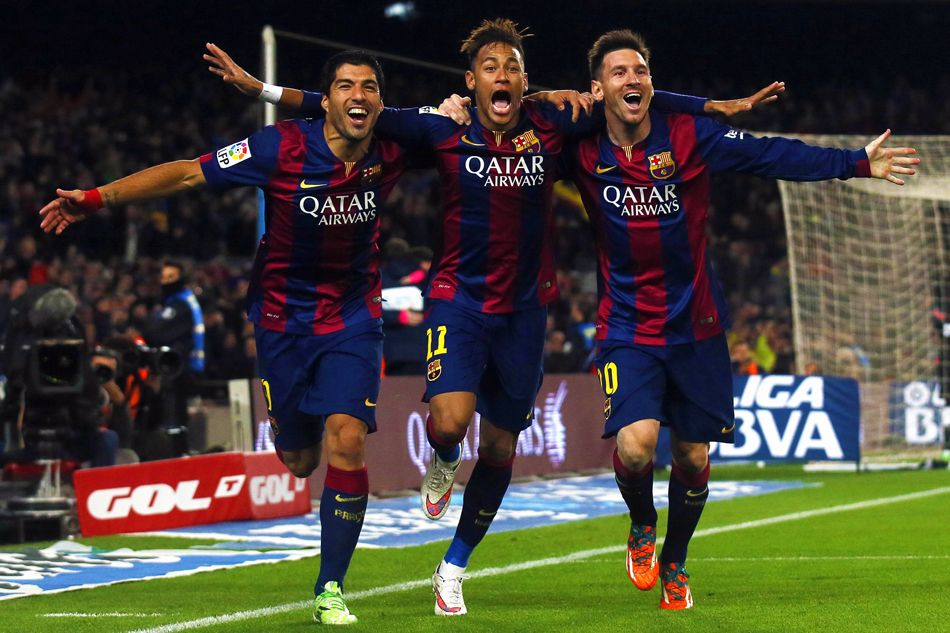

In [ ]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/msn.jpg')
cv2_imshow(img)

FINDING DIMENSIONS

In [ ]:
print(img.shape)          #(length,witdh,channels) channels represents the red blue and green used to represent images

(633, 950, 3)


CHANGING COLORS

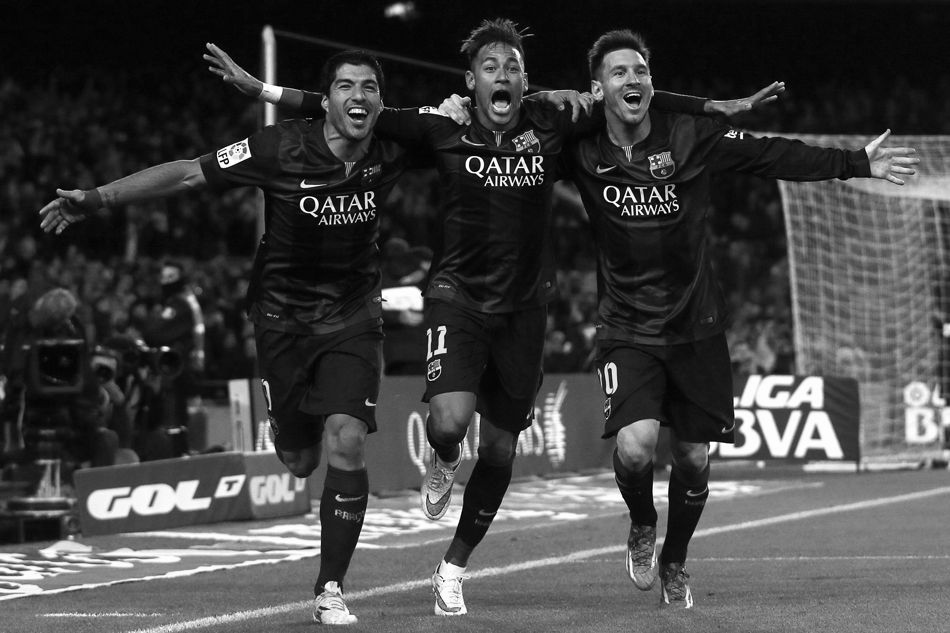

(633, 950)


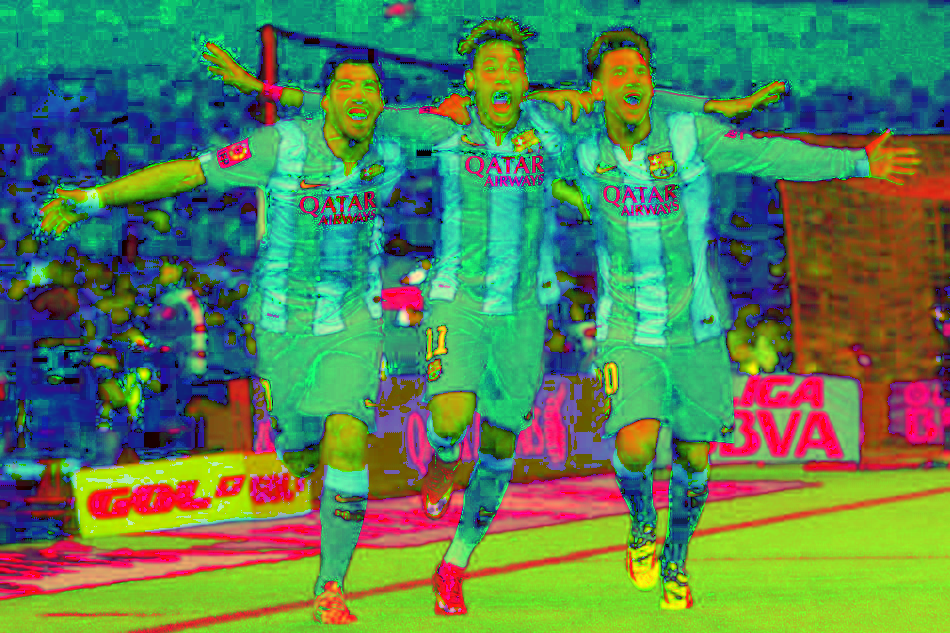

(633, 950, 3)


In [ ]:
#gray_scale_image
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # converts the image to black and white
cv2_imshow(gray)
print(gray.shape)  #we can see the channels change to 1 from 3
#hsv_image(HUE_SATURATION_VARIANCE)
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)
print(hsv.shape)

EDGE DETECTION

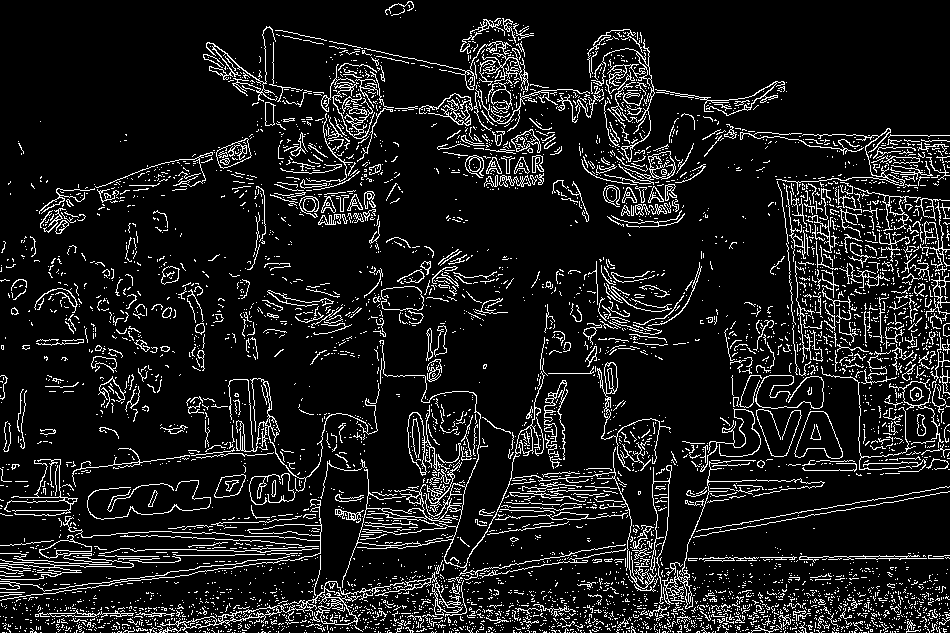

In [ ]:
image=cv2.Canny(gray,70,70) #canny is used for edging
#the numbers are just filters of the image edging and back ground color ideally between 200-500
cv2_imshow(image)

EROSION AND DILATION

ERODED IMAGE


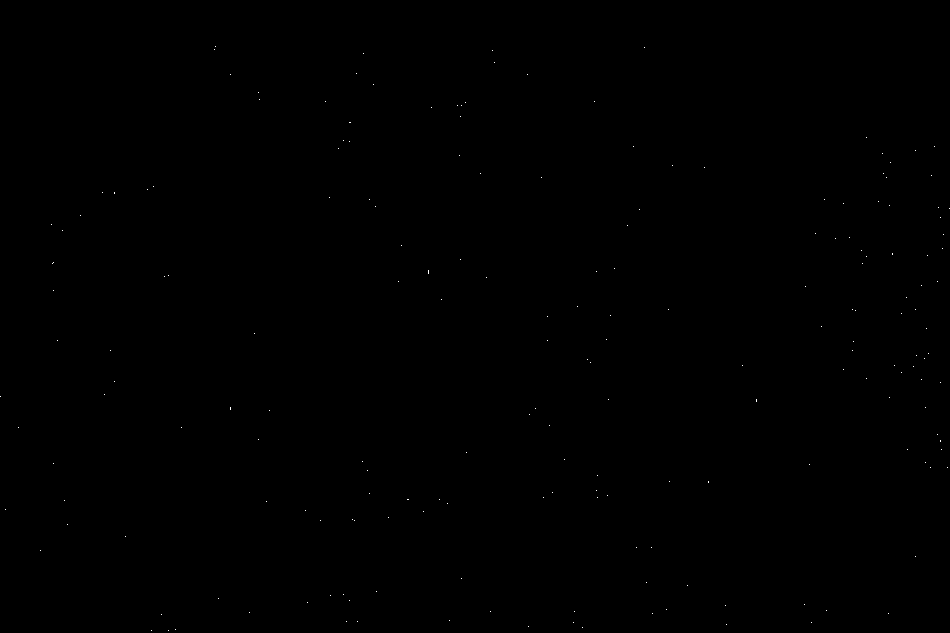


DILATED IMAGE


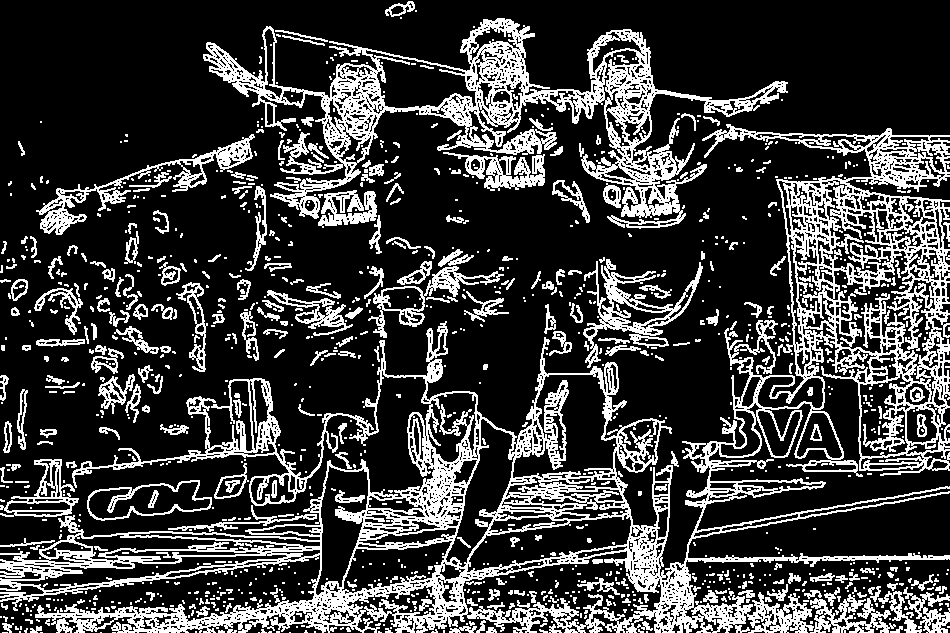


HORIZONTAL COMPARISON


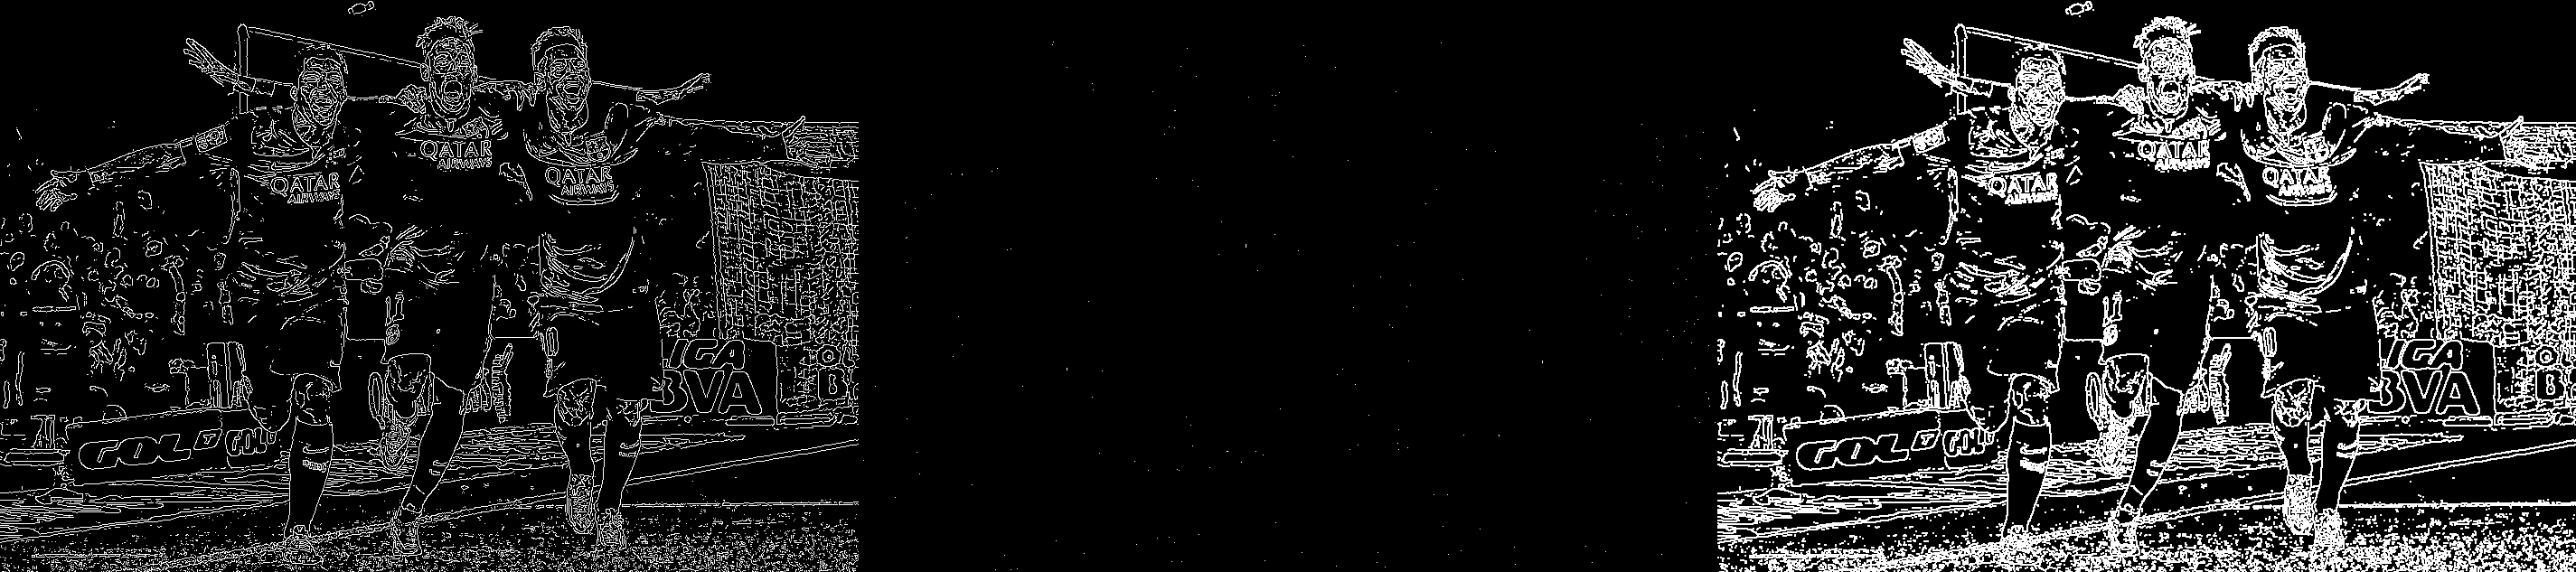

In [ ]:
#EROSION
#used to reduce noice levels in he image
print("ERODED IMAGE")
kernel=np.ones((2,2),np.uint8)
erode_image=cv2.erode(image,kernel,iterations=1)
cv2_imshow(erode_image) 
#DILATION
#opposite of erosion
print("\nDILATED IMAGE")
dilate_image=cv2.dilate(image,kernel,iterations=1)
cv2_imshow(dilate_image)
print("\nHORIZONTAL COMPARISON")
display=np.hstack((image,erode_image,dilate_image))
cv2_imshow(display)

IMAGE MANIPULATION

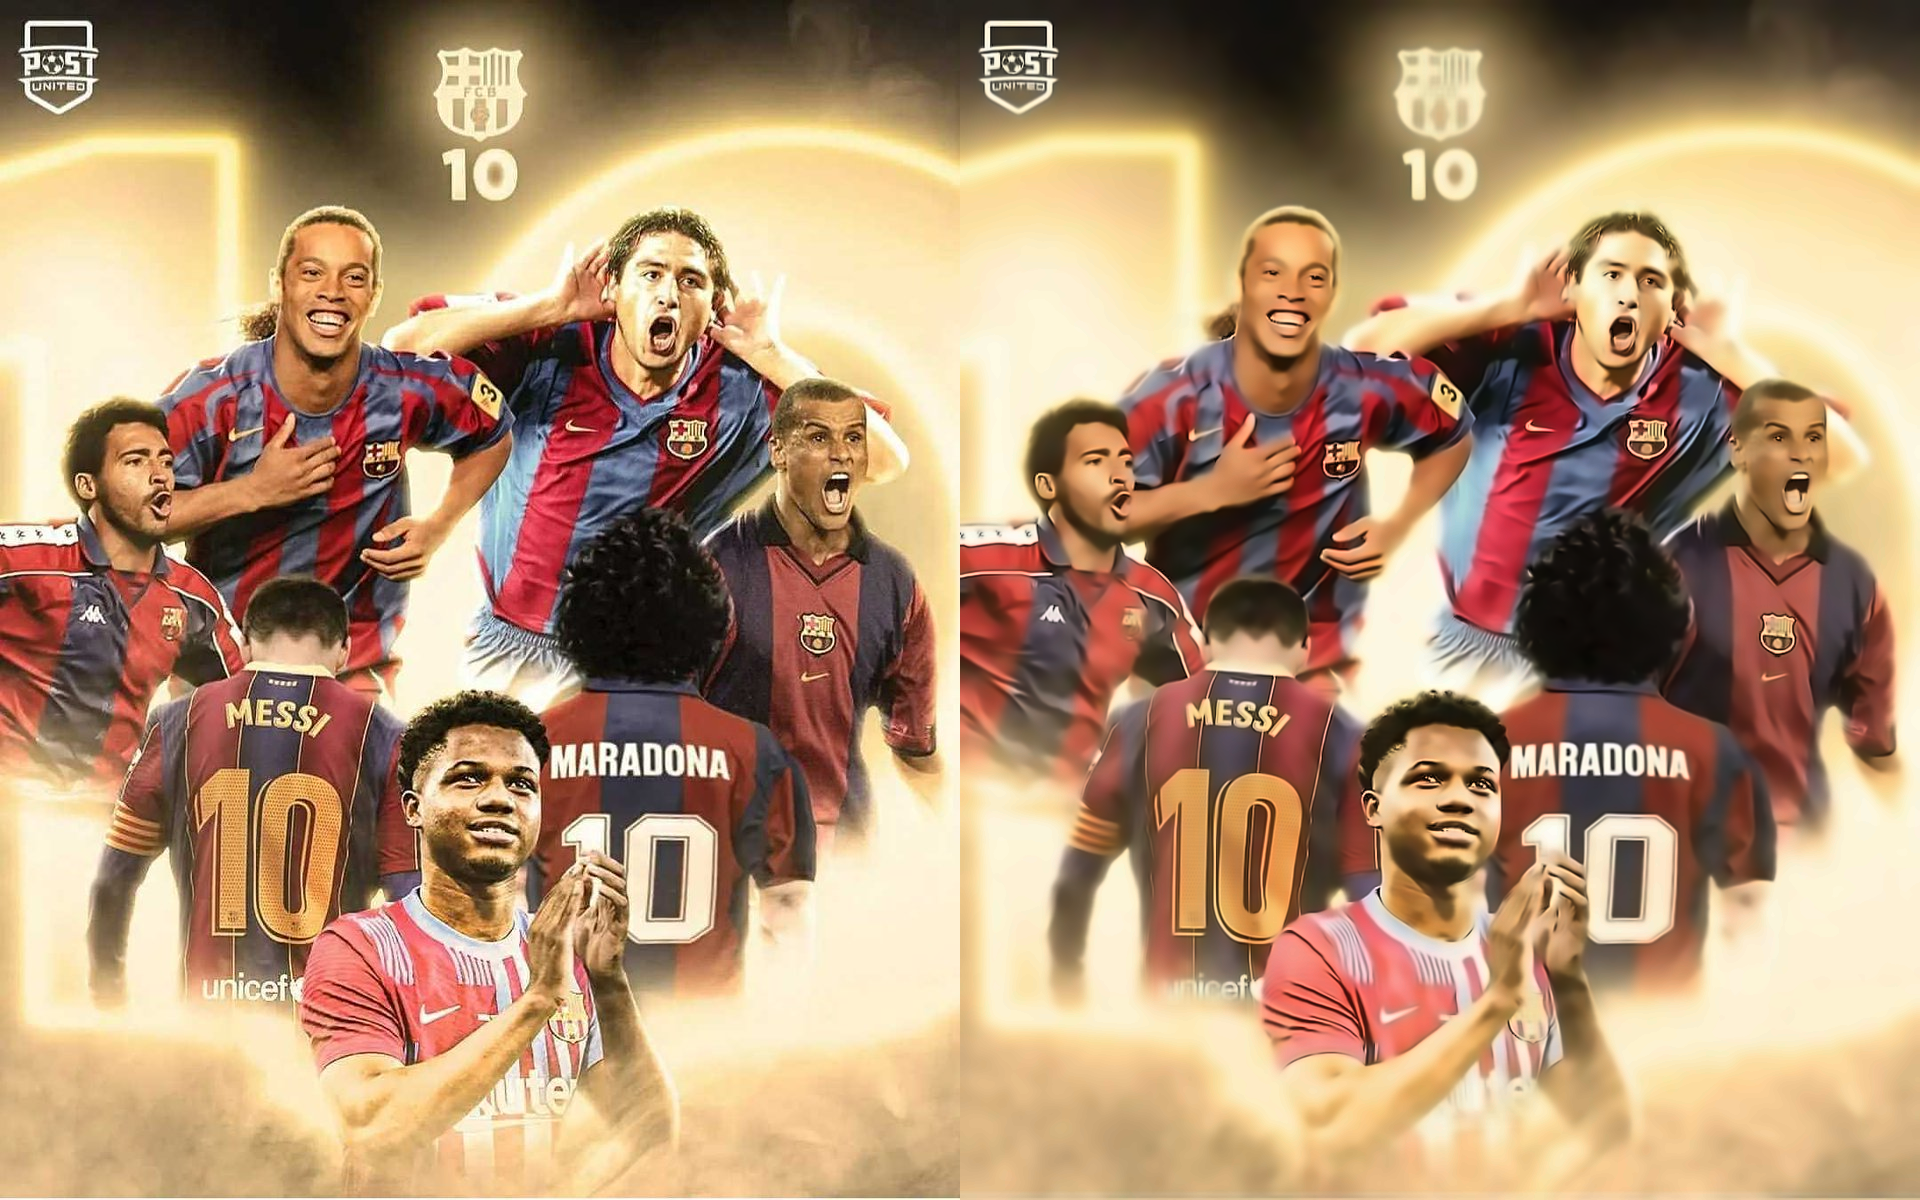

In [ ]:
# Denoising 
# there are many more image manipulations give it a try
img1=cv2.imread('/content/FCB-10.jpg')
dst=cv2.fastNlMeansDenoisingColored(img1,None,20,20,7,15) #finds the noice changes the noice values with the mean of near by points
d=np.hstack((img1,dst))
cv2_imshow(d)

DRAWING AND WRITING ON IMAGES

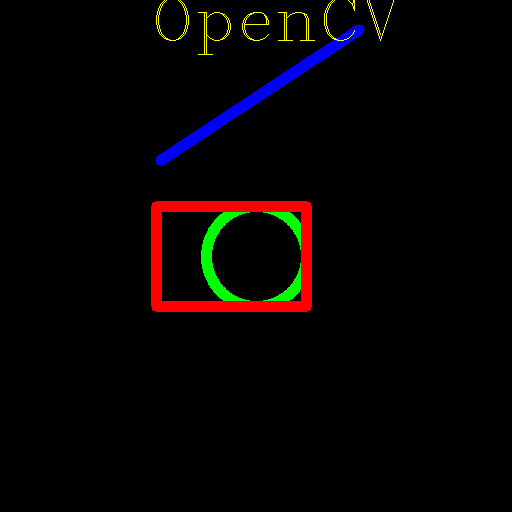

In [ ]:
n=np.zeros((512,512,3),np.uint8) #uint8 means unsigned integers with bit size=8
#cv2_imshow(n) will give a black screen as its zeros
#Drawing a circle
cv2.circle(n,(256,256),50,(0,255,0),10) #color will be green as in BGR form 0,255,0
#Drawing a rectangle
cv2.rectangle(n,(306,306),(156,206),(0,0,255),10)
#Drawing a line
cv2.line(n,(160,160),(359,29),(255,0,0),10)
#Putting text
cv2.putText(n,'OpenCV',(150,40),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,255))
cv2_imshow(n)

COLOR DETECTION

ACTUAL IMAGE:


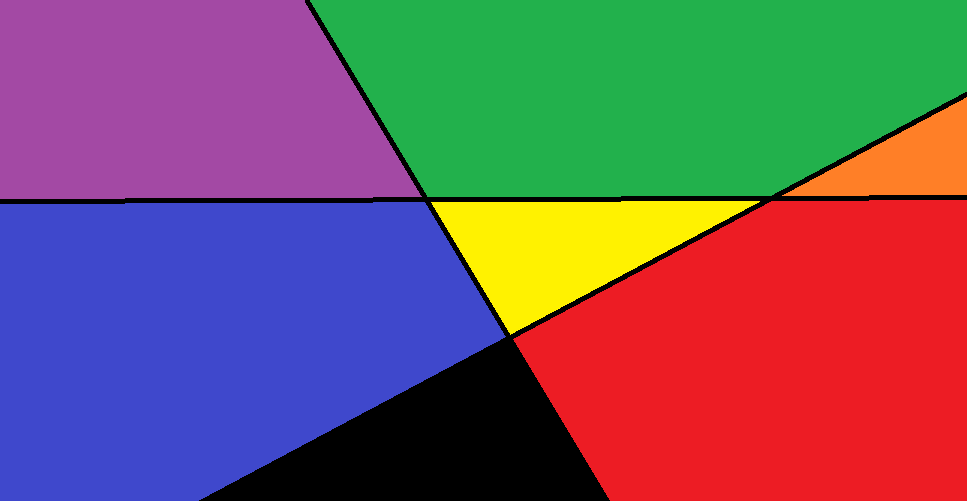

COLOR DETECTION:


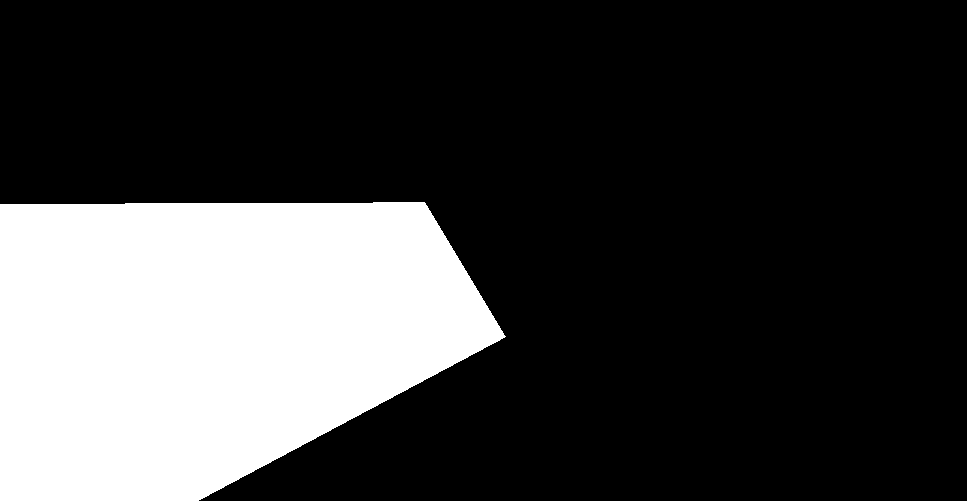

COLOR DETECTED:BLUE


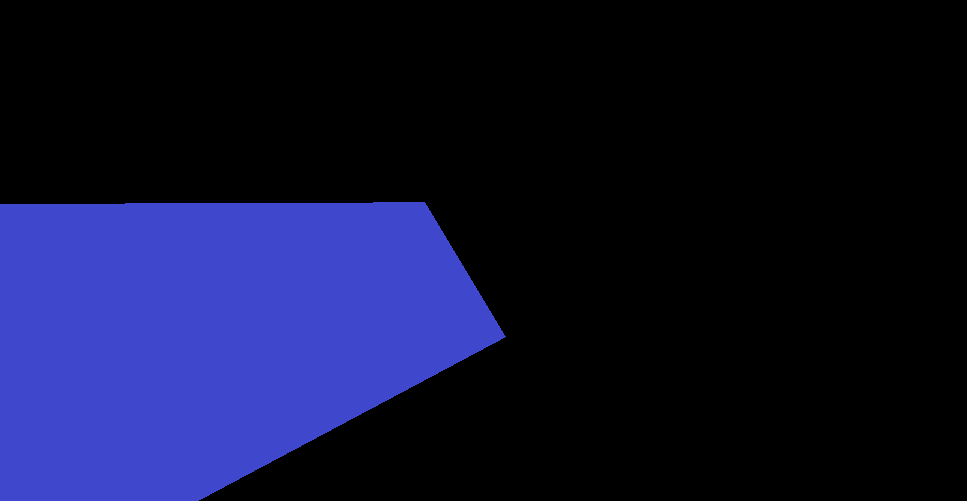

In [ ]:
img2=cv2.imread('/content/coloured-shapes1.png')
hsv1=cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)
#blue color detection
lower_blue=np.array([110,0,0])
upper_blue=np.array([130,255,255])
mask1=cv2.inRange(hsv1,lower_blue,upper_blue)
print("ACTUAL IMAGE:")
cv2_imshow(img2)
print("COLOR DETECTION:")
cv2_imshow(mask1)
result1=cv2.bitwise_and(img2,img2,mask=mask1)
print("COLOR DETECTED:BLUE")
cv2_imshow(result1)


COLOR DETECTION:


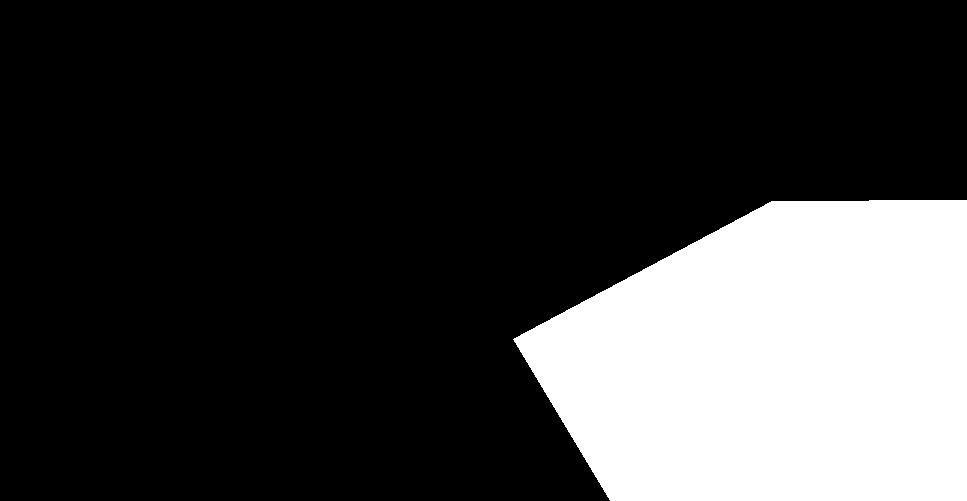

COLOR DETECTED:RED


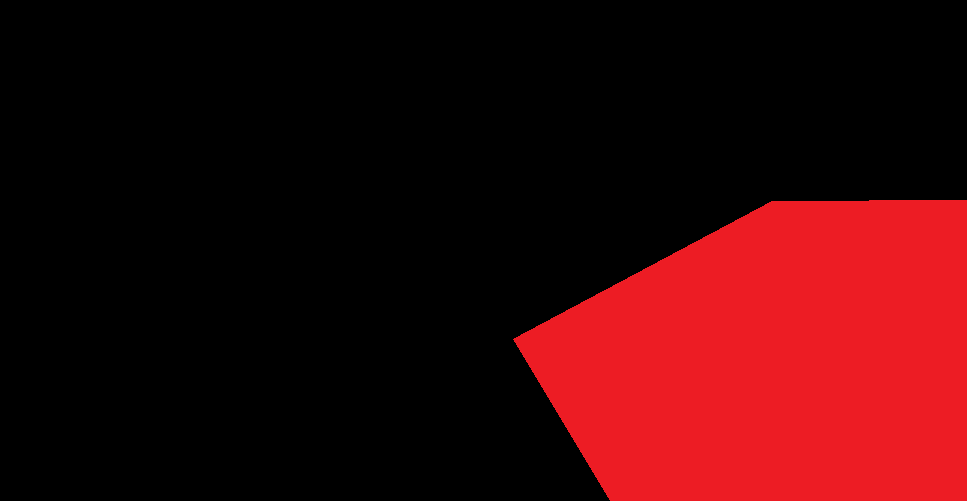

In [ ]:
#red color detection
lower_red=np.array([161,155,84])
upper_red=np.array([179,255,255])
mask2=cv2.inRange(hsv1,lower_red,upper_red)
print("COLOR DETECTION:")
cv2_imshow(mask2)
print("COLOR DETECTED:RED")
result2=cv2.bitwise_and(img2,img2,mask=mask2)
cv2_imshow(result2)

COLOR DETECTION:


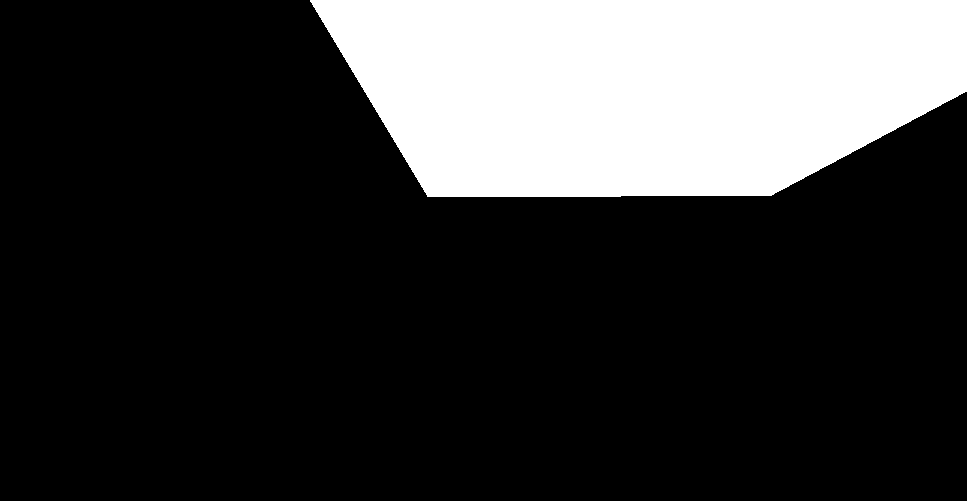

COLOR DETECTED:RED


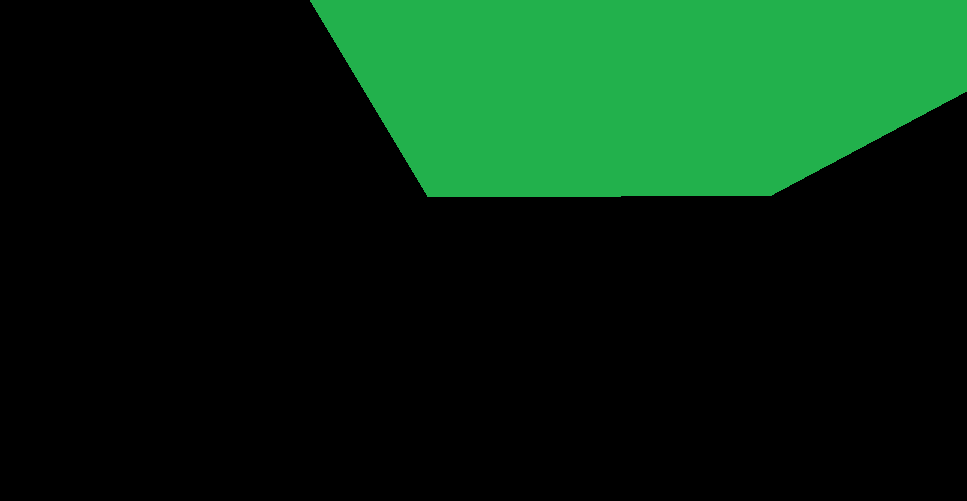

In [ ]:
#green color detection
lower_green=np.array([36,25,25])
upper_green=np.array([70,255,255])
mask3=cv2.inRange(hsv1,lower_green,upper_green)
print("COLOR DETECTION:")
cv2_imshow(mask3)
print("COLOR DETECTED:RED")
result3=cv2.bitwise_and(img2,img2,mask=mask3)
cv2_imshow(result3)

FACE DETECTION

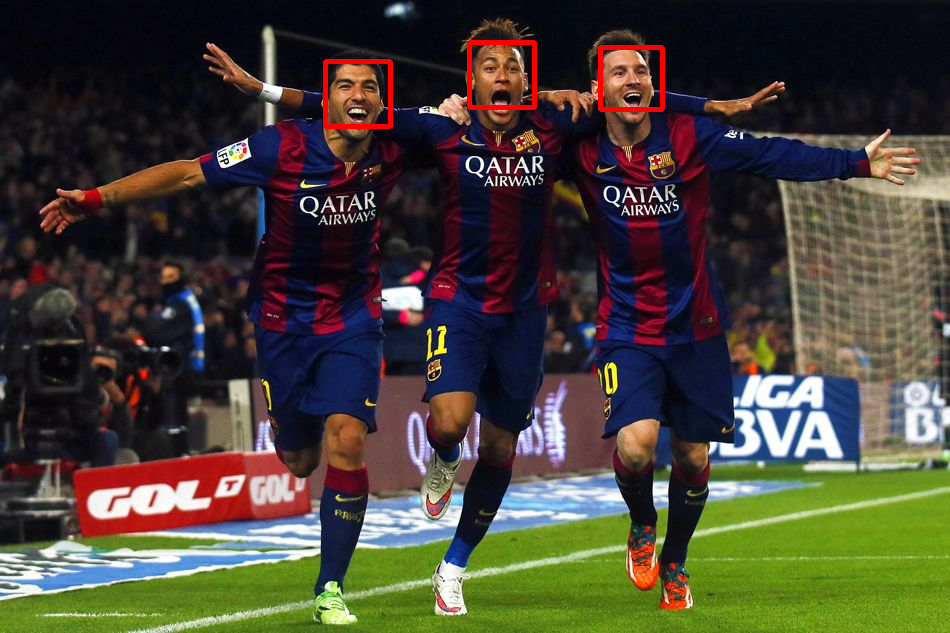

In [ ]:
#needs the haarcascade file
face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
a=0
b=1
c=2
d=3
for i in range(len(faces)):
    cv2.rectangle(img,(faces[i][a],faces[i][b]),(faces[i][a]+faces[i][c],faces[i][b]+faces[i][d]),(0,0,255),3)
cv2_imshow(img)

SHAPE DETECTION

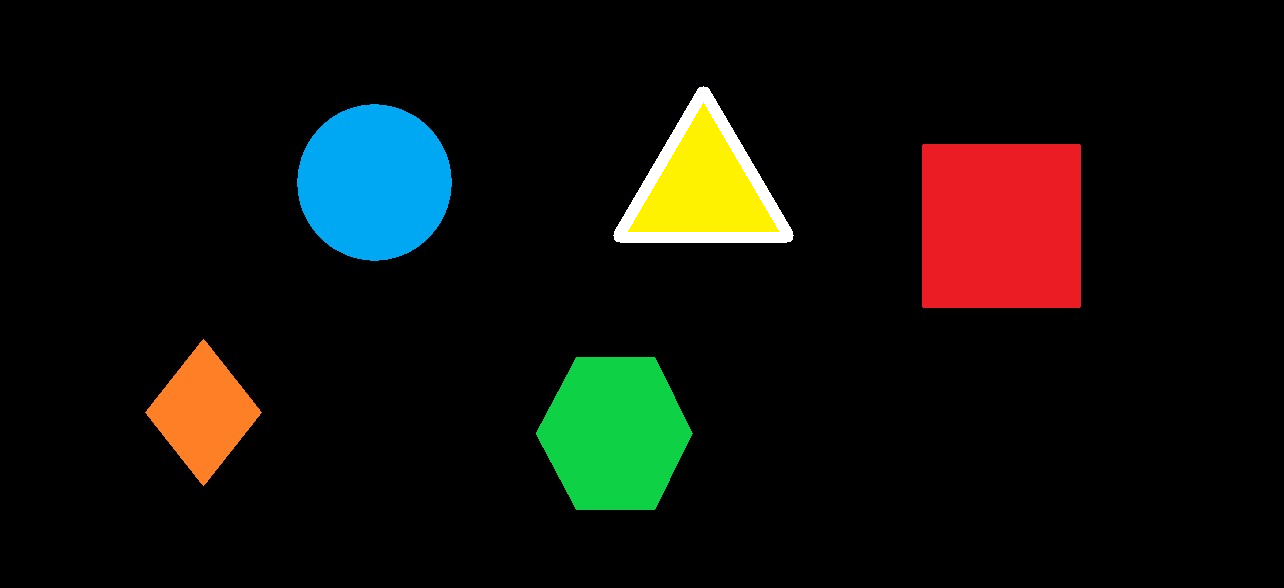

[6, 4, 4, 16, 3, 4]


In [95]:
#this can highlight the shape we require
img3=cv2.imread('/content/shapes.jpg')
gray2=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray2,50,255,1)
contours,h=cv2.findContours(thresh,1,2)
l=[]
for cnt in contours:
  approx=cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True) #gives the co-ordinates of the shape present in the picture 
  n=len(approx)
  if n==3:                        #can give n for n in list l
    cv2.drawContours(img3,[cnt],0,(255,255,255),10)             #highlights the borders
  l.append(len(approx))
cv2_imshow(img3)
print(l)
